# Preparacion de Datos

In [1]:
# importando las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Para imputacion de valores
from sklearn.impute import SimpleImputer

In [2]:
# Indicar que la renderizacion de los graficos sea en el notebook
%matplotlib inline

# Establecer eltilo visual de los graficos
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_theme(style='darkgrid')

## Cargar Datos 

In [3]:
movies_df = pd.read_csv("../data/raw/movies.csv", encoding='utf-8')

In [4]:
movies_df.head()

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [5]:
movies_df.shape

(5043, 19)

In [6]:
movies_df.columns

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

In [7]:
# Nos desasemos de los duplicados
movies_df.drop_duplicates(inplace=True)

In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4944 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                4944 non-null   object 
 1   title_year                 4838 non-null   float64
 2   color                      4925 non-null   object 
 3   aspect_ratio               4617 non-null   float64
 4   duration                   4929 non-null   float64
 5   language                   4930 non-null   object 
 6   country                    4939 non-null   object 
 7   duration.1                 4929 non-null   float64
 8   genres                     4944 non-null   object 
 9   content_rating             4643 non-null   object 
 10  plot_keywords              4792 non-null   object 
 11  director_name              4842 non-null   object 
 12  actor_1_name               4937 non-null   object 
 13  actor_2_name               4931 non-null   object 
 1

In [9]:
# hay dos columnas de duracion. Parecen tener los mismos datos
movies_df[['duration', 'duration.1']].notna().apply(pd.Series.value_counts)

,duration,duration.1
True,4929,4929
False,15,15


In [10]:
( 
    movies_df['duration'] == movies_df['duration.1']
).value_counts()

True     4929
False      15
Name: count, dtype: int64

In [11]:
movies_df[['duration', 'duration.1']][ ( 
    movies_df['duration'] != movies_df['duration.1']
) ]

,duration,duration.1
4,NaN,NaN
199,NaN,NaN
206,NaN,NaN
1510,NaN,NaN
3604,NaN,NaN
3815,NaN,NaN
3834,NaN,NaN
4299,NaN,NaN
4392,NaN,NaN
4397,NaN,NaN


Efectivamente, todas las filas son iguales. 

Procedo a eliminar una de las columnas

In [12]:
movies_df.drop('duration.1', axis=1, inplace=True)

In [13]:
# ver solo columnas numericas 
numericos = (movies_df.dtypes == float) | (movies_df.dtypes == int)
numericos

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                        True
imdb_score                    True
gross                         True
dtype: bool

## Separar datos numericos y categoricos

In [14]:
# Seleccionar columnas numericas
num_cols = movies_df.select_dtypes(include=np.number).columns
num_cols

Index(['title_year', 'aspect_ratio', 'duration', 'cast_total_facebook_likes',
       'budget', 'imdb_score', 'gross'],
      dtype='object')

In [15]:
# Seleccionar columnas numericas
cat_cols = movies_df.select_dtypes(exclude=np.number).columns
cat_cols

Index(['movie_title', 'color', 'language', 'country', 'genres',
       'content_rating', 'plot_keywords', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name'],
      dtype='object')

In [16]:
movies_df[num_cols]

,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,2009.0,1.78,178.0,4834,237000000.0,7.9,760505847.0
1,2007.0,2.35,169.0,48350,300000000.0,7.1,309404152.0
2,2015.0,2.35,148.0,11700,245000000.0,6.8,200074175.0
3,2012.0,2.35,164.0,106759,250000000.0,8.5,448130642.0
4,NaN,NaN,NaN,143,NaN,7.1,NaN
...,...,...,...,...,...,...,...
5038,2013.0,NaN,87.0,2283,NaN,7.7,NaN
5039,NaN,16.00,43.0,1753,NaN,7.5,NaN
5040,2013.0,NaN,76.0,0,1400.0,6.3,NaN
5041,2012.0,2.35,100.0,2386,NaN,6.3,10443.0


## Inspeccion Cuantitativa 

In [17]:
movies_df[num_cols].describe()

,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
count,4838.000000,4617.000000,4929.000000,4944.000000,4.458000e+03,4944.000000,4.076000e+03
mean,2002.452873,2.221975,107.169406,9599.654935,3.944862e+07,6.437601,4.772664e+07
std,12.471102,1.399009,25.292436,18142.994502,2.080487e+08,1.126073,6.734420e+07
min,1916.000000,1.180000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,1396.000000,6.000000e+06,5.800000,5.100703e+06
50%,2005.000000,2.350000,103.000000,3054.000000,2.000000e+07,6.600000,2.512979e+07
75%,2011.000000,2.350000,118.000000,13631.750000,4.400000e+07,7.200000,6.115493e+07
max,2016.000000,16.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


<Axes: >

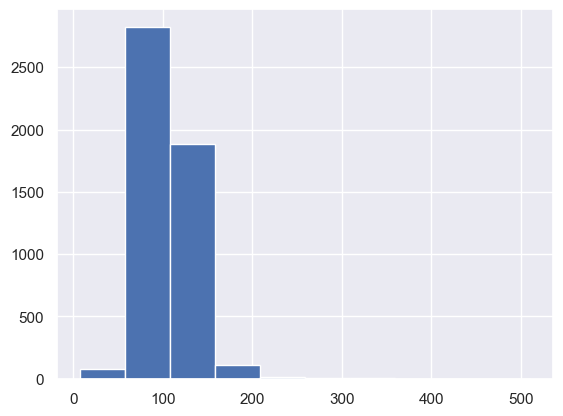

In [18]:
movies_df[num_cols]['duration'].hist()

<Axes: >

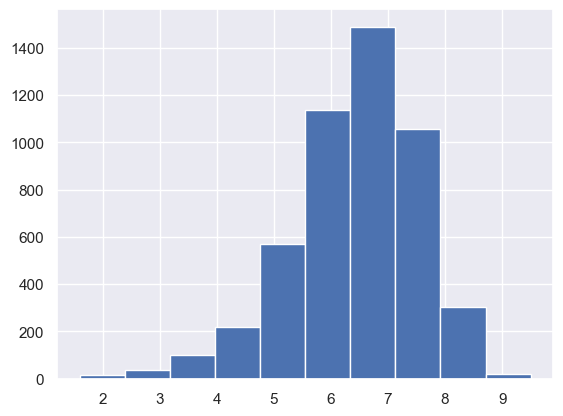

In [19]:
movies_df[num_cols]['imdb_score'].hist()

<Axes: >

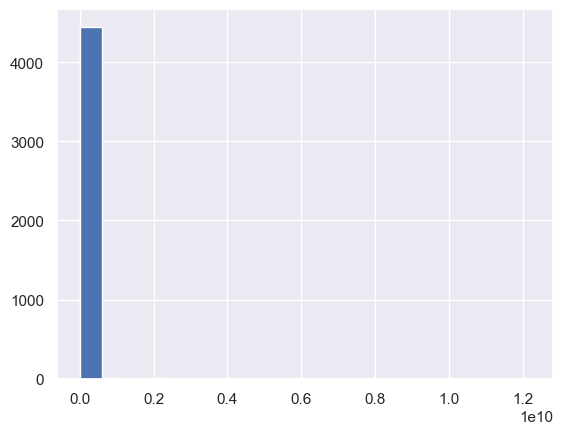

In [20]:
movies_df[num_cols]['budget'].hist(bins=20)

Primer comportamiento extraño. Hagamos un poco de zoom...

In [21]:
(movies_df[num_cols]['budget'] > 1e9).value_counts()

budget
False    4938
True        6
Name: count, dtype: int64

Hay 6 peliculas con presupuestos por encima de mil millones de dolares 

In [22]:
movies_df[movies_df[num_cols]['budget'] > 1e9]

,movie_title,title_year,color,aspect_ratio,duration,language,country,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


Son peliculas todas peliculas asiaticas. lo que nos podria indicar que el valor que tenemos en la base de datos no esta en dolares.

![title](../references/Akira_budget_at_IMDB%20Medium.png)
https://www.imdb.com/title/tt0094625/

Efectivamente. Por ahora no podemos confiar en los datos de moneda. 

Para solucionar el problema, tenemos datos nuevos de thenumbers.com, pagina que ya no existe (por desgracia) pero que tiene todos los datos financienros en dolares. 

In [23]:
# Eliminamos las columnas corruptas
movies_df.drop(['budget', 'gross'], inplace=True, axis=1)

In [24]:
financial_data = pd.read_csv("../data/raw/thenumbers_movies.csv", encoding='utf-8')

In [25]:
financial_data = financial_data[['movie_title', 'production_budget', 'worldwide_gross']]

In [26]:
print(financial_data.shape)
print(movies_df.shape)

(4341, 3)
(4944, 16)


Al hacer le merge con el nuevo conjunto de datos, perderiamos un poco más de 600 filas, pero no importa. Es mejor tener datos limpios y para el caso no representan una perdida significativa.

In [27]:
# Unir los dos datasets 
(
    pd.merge(financial_data, movies_df, on='movie_title', how='left')
    .to_csv('../data/processed/movies_financial_fix.csv', index=False)
)
movies_v2_df = pd.read_csv("../data/processed/movies_financial_fix.csv") 

In [28]:
# con este movimiento nos quedan poco más cuarenta datos con casillas nulas
# Ya mismo lo resolvemos 

# filtro por titulo y año. Para descartar peliculas con mismo nombre 
mask = movies_v2_df.duplicated(keep=False, subset=['movie_title', 'title_year', ])


# movies_v2_df[mask].isna().sum(axis=1)
# Pensaba conservar los que tuvieran menos valores nulos
# Pero eso parece no ser un factor relevante 

movies_v2_df[mask].groupby('movie_title')['cast_total_facebook_likes'].diff()

39       NaN
40      -1.0
145      NaN
146     -1.0
293      NaN
294     -1.0
688      NaN
689      1.0
772      NaN
773     -2.0
884      NaN
885     -1.0
1349     NaN
1350    -2.0
1842     NaN
1843   -13.0
1928     NaN
1929    -1.0
Name: cast_total_facebook_likes, dtype: float64

LA difewrencia es insignificante, asi que no importa cual de lo los duplicados borremos.

In [29]:
movies_v2_df.shape

(4352, 18)

In [30]:
# borrando duplicados 
movies_v2_df.drop_duplicates(subset=['movie_title', 'title_year'], inplace=True)

In [31]:
movies_v2_df.shape

(4343, 18)

## Manejo de Datos Faltantes

In [32]:
# revisando cantidad de nulos explicitos
movies_v2_df.isna().apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,color,aspect_ratio,duration,language,country,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,imdb_score
False,4343.0,4343.0,4343.0,4316,4325,4071,4330,4330,4339,4343.0,4117,4217,4320,4336,4333,4324,4343.0,4343.0
True,NaN,NaN,NaN,27,18,272,13,13,4,NaN,226,126,23,7,10,19,NaN,NaN


In [33]:
# Revisando las celdas con valor 0
(movies_v2_df == 0).apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,color,aspect_ratio,duration,language,country,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,imdb_score
False,4343.0,4343.0,4063,4343.0,4343.0,4343.0,4343.0,4343.0,4343.0,4343.0,4343.0,4343.0,4343.0,4343.0,4343.0,4343.0,4316,4343.0
True,NaN,NaN,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN


In [34]:
datos_buenos = ( (movies_v2_df != 0) & movies_v2_df.notna() )

# Contar cuantas filas tinen datos completos
datos_buenos.all(axis=1).value_counts()

True     3773
False     570
Name: count, dtype: int64

Son demasiados datos como para desecharlos todos.

Al final, el dato mas importante a preserbar es 'worldwide_gross'

In [35]:
# Descartar fila si contiene nulo en la worldwide_gross
movies_v2_df[datos_buenos['worldwide_gross']].to_csv('../data/processed/final_movies_df', index=False)
final_movies_df = pd.read_csv('../data/processed/final_movies_df')

In [36]:
(
    ( final_movies_df.notna() ) & ( final_movies_df != 0 )
)['worldwide_gross'].value_counts()

worldwide_gross
True    4063
Name: count, dtype: int64

Asi reducimos la cantidad de datos desechados, manteniendo sana la variable objetivo. 

### Imputacion de datos

In [37]:
# Para rellenar los datos nulos que aun quedan
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [38]:

num_cols = final_movies_df.select_dtypes(include=np.number).columns
values = imputer.fit_transform(final_movies_df[num_cols])

In [39]:
final_movies_df[num_cols].columns

Index(['production_budget', 'worldwide_gross', 'title_year', 'aspect_ratio',
       'duration', 'cast_total_facebook_likes', 'imdb_score'],
      dtype='object')

## Obteniendo X

In [41]:
(
    pd.DataFrame(values, index=final_movies_df.index, columns=final_movies_df[num_cols].columns)
    .to_csv('../data/processed/final_movies_imputados_df.csv', index=False)
)